In [1]:
import pandas as pd
import numpy as np
import time
import datetime
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import sys
windows_os = False

if windows_os:
    base_path = "C:/Users"
else:
    base_path = r"/media/gianlucanogara/Windows/Users"

path_utils = base_path + "/gianluca.nogara/Desktop/Repo/Vaccines_Discussion_Italy/tweet_utils"
sys.path.append(path_utils)
import utils
base = base_path + "/gianluca.nogara/Desktop/Repo/Vaccines_Discussion_Italy/Italian"

In [7]:
df = pd.read_csv(base + "/files/tweets/tweets_without_useless_and_score (5.0).csv", lineterminator="\n", low_memory=False, encoding="utf-8")

In [4]:
df['conspiracy_score'] = np.around(((df['LOW'])/(df['HIGH']+df['LOW'])),2)
df=df.sort_values(by=['conspiracy_score'], ascending=False)
df.head(10)

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,domain,number_of_urls,LOW,HIGH,UNKW,SOCIAL,conspiracy_score
1,1221737274108469248,1221737274108469248,Mon Jan 27 10:10:39 +0000 2020,1622970242,Intuitizioni,False,Fri Jul 26 13:32:45 +0000 2013,"https://t.co/oNhi3KHwgx\n \n""la fondazione del...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,['lacrunadellago.net'],1,1,0,0,0,1.0
329406,1363220051734724611,1363220051734724611,Sat Feb 20 20:12:42 +0000 2021,317671787,infoitinterno,False,Wed Jun 15 09:00:41 +0000 2011,"Covid, Fontana sui vaccini: “Stop tagli, Dragh...","<a href=""http://www.informazione.it"" rel=""nofo...",NaN,...,NaN,NaN,NaN,['informazione.it'],1,1,0,0,0,1.0
329414,1363220055366975490,1363220055366975490,Sat Feb 20 20:12:43 +0000 2021,317671787,infoitinterno,False,Wed Jun 15 09:00:41 +0000 2011,"Covid in Liguria, Tosi (M5s): «Toti acceleri s...","<a href=""http://www.informazione.it"" rel=""nofo...",NaN,...,NaN,NaN,NaN,['informazione.it'],1,1,0,0,0,1.0
329415,1363220395713851396,1363220395713851396,Sat Feb 20 20:14:04 +0000 2021,1319911953503059968,Novanews242,False,Sat Oct 24 08:01:55 +0000 2020,Sud Africa sospese vaccinazioni Astra Zeneca e...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,['novanews24.altervista.org'],1,1,0,0,0,1.0
329417,1363220739948761090,1363220739948761090,Sat Feb 20 20:15:26 +0000 2021,1243309741377552402,AnnalisaAntoni6,False,Thu Mar 26 22:52:11 +0000 2020,"Pfizer, ex vicepresidente contro il vaccino: «...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,['oltre.tv'],1,1,0,0,0,1.0
329418,1363220328525287425,1363220328525287425,Sat Feb 20 20:13:48 +0000 2021,1319911953503059968,Novanews242,False,Sat Oct 24 08:01:55 +0000 2020,Covid: Di questo passo immunità di gregge arri...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,['novanews24.altervista.org'],1,1,0,0,0,1.0
329420,1363220760291082244,1363220760291082244,Sat Feb 20 20:15:31 +0000 2021,1246691120953860099,Pedro47948766,False,Sun Apr 05 06:48:31 +0000 2020,NO di molte nazioni vaccino DNA AstraZeneca ht...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,['sadefenza.org'],1,1,0,0,0,1.0
329421,1363220434934710285,1363220434934710285,Sat Feb 20 20:14:13 +0000 2021,1319911953503059968,Novanews242,False,Sat Oct 24 08:01:55 +0000 2020,Vaccini Astrazeneca a under 55: per insegnanti...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,['novanews24.altervista.org'],1,1,0,0,0,1.0
329424,1363221107948597248,1363221107948597248,Sat Feb 20 20:16:54 +0000 2021,1319911953503059968,Novanews242,False,Sat Oct 24 08:01:55 +0000 2020,Covid: Di questo passo immunità di gregge arri...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,['novanews24.altervista.org'],1,1,0,0,0,1.0
329425,1363221175527235584,1363221175527235584,Sat Feb 20 20:17:10 +0000 2021,1319911953503059968,Novanews242,False,Sat Oct 24 08:01:55 +0000 2020,Sud Africa sospese vaccinazioni Astra Zeneca e...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,['novanews24.altervista.org'],1,1,0,0,0,1.0


In [5]:
dates = []
for i in tqdm(df["created_at"]):
    dates.append(utils.process_datetime(i))
df["dates"] = dates
df_plot = df[["dates","conspiracy_score"]]
df_plot = df_plot.groupby(by='dates').mean()
# df['high_count'] = df.groupby(['HIGH'])['created_at'].transform('size')
# df['social_count'] = df.groupby(['SOCIAL'])['created_at'].transform('size')
# tweets_for_plot = df.drop_duplicates(subset='dates')

100%|██████████| 634398/634398 [00:46<00:00, 13601.93it/s]


In [6]:
df_plot.reset_index(inplace=True)

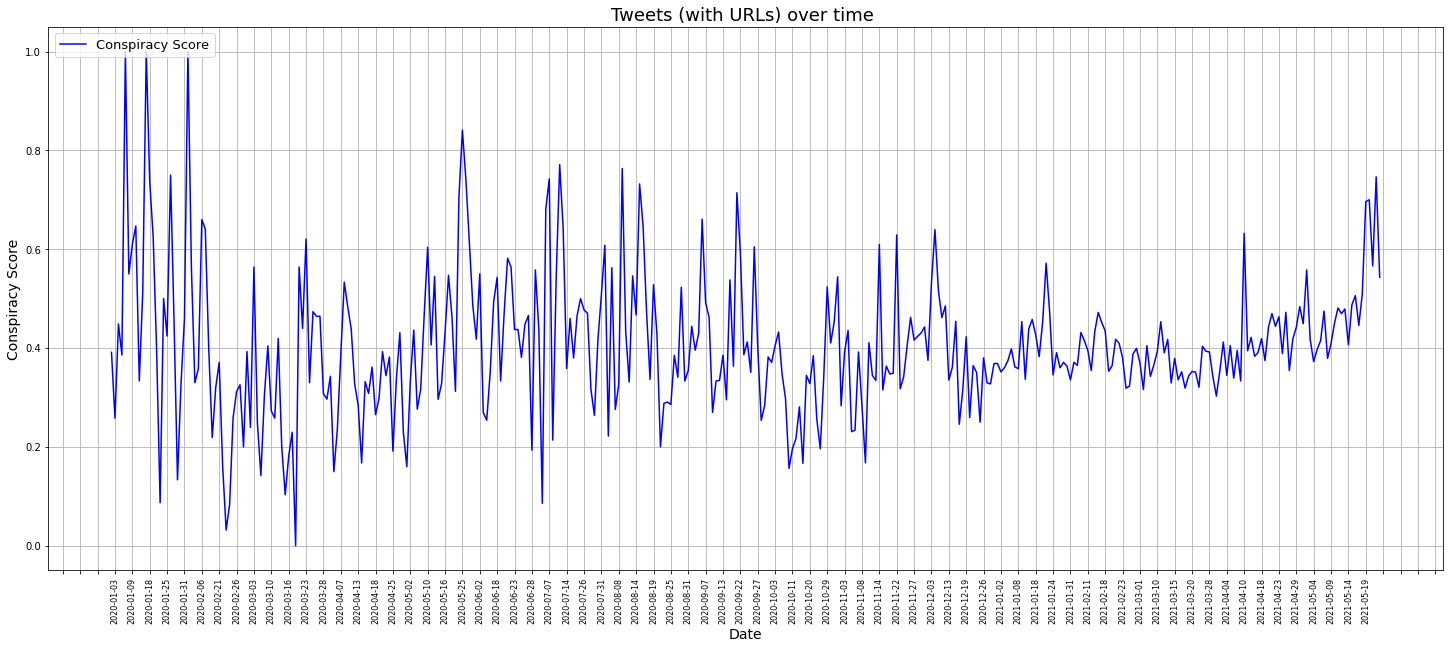

In [7]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Tweets (with URLs) over time ', fontsize=18)
df_plot.sort_values(by=["dates"], ascending=True, inplace=True)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Conspiracy Score', fontsize=14)

plt.plot(df_plot['dates'], df_plot['conspiracy_score'], c='b', label='Conspiracy Score')

ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))

plt.xticks(rotation='vertical', fontsize = 8)
plt.legend(loc='upper left', fontsize=13);
plt.grid()
plt.show()

In [8]:

date = ["2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08",
        "2020-09", "2020-10", "2020-11", "2020-12", "2021-01", "2021-02", "2021-03", "2021-04",
        "2021-05"]
scores = []
for data in date:
    score_mean = []
    for i in df_plot.itertuples():
        if data in i.dates:
            score_mean.append(i.conspiracy_score)
    scores.append(np.mean(score_mean))
    print(f"{data} score: {np.mean(score_mean)}")

2020-01 score: 0.5013150380664737
2020-02 score: 0.3679485681539153
2020-03 score: 0.3277921593301555
2020-04 score: 0.3275941051123
2020-05 score: 0.46318543352383573
2020-06 score: 0.4233062558616594
2020-07 score: 0.46448486452935756
2020-08 score: 0.42718659422332045
2020-09 score: 0.42751011070346556
2020-10 score: 0.3244938545674819
2020-11 score: 0.3809804199429374
2020-12 score: 0.38863085047802215
2021-01 score: 0.3969848267750599
2021-02 score: 0.3935877595668941
2021-03 score: 0.3666804628263027
2021-04 score: 0.41125059708320066
2021-05 score: 0.4938540428114834


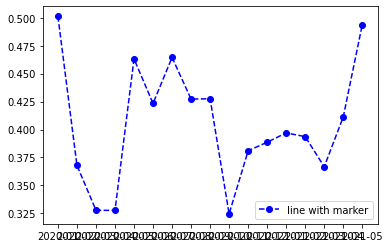

In [9]:
import matplotlib.pyplot as plt

xs = date
ys = scores
plt.plot(xs, ys, linestyle='--', marker='o', color='b', label='line with marker')
plt.legend()

# Both rt

In [39]:
path = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/retweets.parquet"
rt = pd.read_parquet(path, engine="fastparquet")
rt.head()

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media,user_tweets_count,user_friends_count,user_followers_count
0,1221739084449832960,1221739084449832960,Mon Jan 27 10:17:51 +0000 2020,241972508,planetpaul65,False,Sun Jan 23 16:31:07 +0000 2011,La Memoria è l’unico vaccino contro l’indiffer...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,"[{'text': 'GiornatadellaMemoria2020', 'indices...",[],"[{'screen_name': 'isentinelli', 'name': '@isen...",[],[],"[{'id': 1221708229090127872, 'id_str': '122170...",NaN,NaN,NaN
1,1221737155380293640,1221737155380293640,Mon Jan 27 10:10:11 +0000 2020,1179711277,Grace_1207,False,Thu Feb 14 16:37:35 +0000 2013,"Oggi sono arrivati loro, 3 femminucce e 1 masc...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,[],[],"[{'screen_name': 'LidaSezOlbia', 'name': 'Lida...",[],[],[],NaN,NaN,NaN
2,1221730009989120001,1221730009989120001,Mon Jan 27 09:41:47 +0000 2020,115121530,MarisaMinervini,False,Wed Feb 17 17:40:09 +0000 2010,L'indifferenza è più colpevole della violenza ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'milio967', 'name': 'Εμιλιο ♌...",[],[],[],NaN,NaN,NaN
3,1221728980203724801,1221728980203724801,Mon Jan 27 09:37:42 +0000 2020,908731428124397568,arual812,False,Fri Sep 15 16:37:10 +0000 2017,"""Coltivare la Memoria è ancora oggi un vaccino...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'Annalisa3073', 'name': 'Anna...",[],[],[],NaN,NaN,NaN
4,1221732930738905088,1221732930738905088,Mon Jan 27 09:53:24 +0000 2020,3194573930,pvsassone,False,Wed May 13 17:31:39 +0000 2015,Ma prima una premessa per chi non conosce la v...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'FabbioSabatini', 'name': 'Fa...",[],[],[],NaN,NaN,NaN


In [41]:
path = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Giada/Files/"
bad = list(pd.read_csv(path + "bad.csv")["screen_name"])
good = list(pd.read_csv(path + "good.csv")["screen_name"])
rt_flt = rt[(rt["rt_user_screen_name"].isin(bad)) | (rt["rt_user_screen_name"].isin(good))][["user_screen_name", "rt_user_screen_name"]]
rt_flt.head()

,user_screen_name,rt_user_screen_name
326,palancellotti,intuslegens
327,Jambonet1,intuslegens
328,mgdbertelli,intuslegens
341,BettainChin,intuslegens
357,piersar62,MinervaMcGrani1


In [42]:
del rt

In [58]:
names = rt_flt[rt_flt["user_screen_name"].map(rt_flt["user_screen_name"].value_counts()) > 5]
n = set(names["user_screen_name"])

In [59]:
lst = []
for name in tqdm(n):
    cont_bad = 0
    cont_good = 0
    for row in rt_flt.itertuples():
        if row.user_screen_name == name:
            if row.rt_user_screen_name in bad:
                cont_bad += 1
            elif row.rt_user_screen_name in good:
                cont_good += 1
    lst.append((name,cont_good,cont_bad))

100%|██████████| 9033/9033 [1:37:39<00:00,  1.54it/s]  


In [67]:
both = []
for i in lst:
    if (i[1] > 0) & (i[2] > 0):
        both.append(i[0])
        print(i)

('piemarcy', 1, 40)
('fpoli62_poli', 1, 6)
('AriannaAmbrosi0', 7, 1)
('ENRICO27218318', 5, 81)
('NETLOR777', 1, 10)
('PappaletteraF', 10, 1)
('EureosCriss', 1, 464)
('Efisio31251859', 3, 184)
('Sissi32861168', 1, 20)
('stenric56', 1, 25)
('Trovolavorobiz', 1, 26)
('mi00110011', 1, 12)
('Ashmira1', 1, 73)
('Maria26046585', 1, 5)
('npedelini', 1, 11)
('venetolink', 1, 90)
('BarbaraPerla2', 1, 7)
('PaoloBMb70', 1, 35)
('ILupobianco', 3, 21)
('PasqualeSqueo', 4, 13)
('italiarena', 1, 11)
('libellula58', 10, 4)
('Peter_Italy', 1, 11)
('marfac70', 2, 9)
('AntonellaCeras1', 5, 1)
('tigrelt', 1, 73)
('mandarallo', 1, 45)
('ColucciLc', 6, 1)
('Giovannaconfal6', 6, 1)
('BroglieRebecca', 1, 12)
('IsaInghirami', 20, 4)
('uandarin', 11, 1)
('lucma66', 3, 8)
('PaoloAnnibali', 4, 4)
('StracciVolano', 7, 2)
('CettinaCaminiti', 1, 17)
('Michelle_Off_Pr', 2, 9)
('raffaellamucci1', 1, 11)
('carloangeli', 1, 92)
('sotirias', 1, 135)
('CoronaBot20', 1, 11)
('GirolamoNavarra', 1, 29)
('iostoconCRISTO', 1, 2

In [66]:
rt_flt[rt_flt["user_screen_name"].isin(both)]

,user_screen_name,rt_user_screen_name
374,Peter_Italy,MinervaMcGrani1
391,IMoresi,MinervaMcGrani1
399,the_fourty,RobertoBurioni
434,andfranchini,valy_s
585,giandomenic45,cris_cersei
...,...,...
2414387,ShardanFreeMan,valy_s
2414451,viralvideovlogs,valy_s
2414455,anto_valentini,valy_s
2414466,vallant80,noitre32
